<a href="https://colab.research.google.com/github/nprentza/xaimedical/blob/main/notebooks/XGBoost_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data from diabetes_earlystage.csv file on github.

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/nprentza/xaimedical/main/datasets/diabetes_earlystage.csv'
df = pd.read_csv(url)

Separate features/predictors (x) and target variable (y).

In [2]:
import pandas as pd

x=df.drop(["patientclass"], axis=1)
y=df.patientclass

Split data into train and test.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

Train a XGBoost model and predict the response for the test set (x_test).

In [9]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=42) # Creating a XGB Classifier
xgc.fit(X_train, y_train)

predictions = xgc.predict(X_test)

accuracy_score(y_test, predictions)

0.9615384615384616

Explain predictions with SHAP

In [10]:
#!pip install shap

import shap
# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed
shap.initjs()

In [11]:
# creating an explainer for our model
explainer = shap.TreeExplainer(xgc)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: 0.5340313


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-3.037959,-0.703777,2.180121,-1.262906,-0.500061,-0.350009,0.440319,-0.615291,0.514444,-1.943298,-0.504526,-0.852253,0.698251,-0.371644,0.316097,0.118852
1,-0.374042,1.325830,2.187747,3.174068,-0.399469,-0.212203,0.654573,-0.253195,-0.307998,-0.445919,-0.212760,0.162757,0.146458,-0.074546,0.044782,0.123350
2,-0.257021,-0.715760,2.781434,2.808047,-0.473902,0.340938,0.653392,0.331414,-0.411081,0.354508,-0.474267,-0.246737,0.163050,0.256704,-0.354325,0.171844
3,-0.137387,-0.334202,1.735662,2.773615,0.956540,0.149913,1.062058,0.863897,0.255017,-0.107568,1.284049,0.324561,-0.078222,-0.118647,-0.015526,-0.322378
4,0.802253,3.695403,-0.983573,-0.729840,-0.514638,-0.167888,0.708429,-0.296313,1.132853,-0.568374,-0.237331,0.912756,0.570075,0.210115,0.669565,0.042844


In [12]:
shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values[0,:], X_test.iloc[1])

Extract and Visualize Feature Importance with SHAP

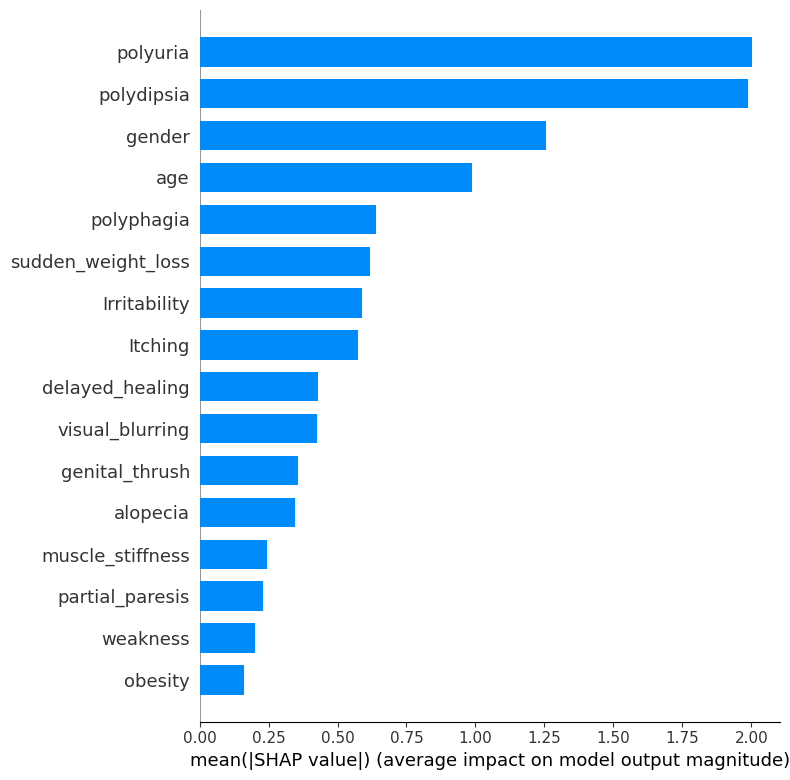

In [13]:
shap.initjs()
shap.summary_plot(shap_values,
                  X_test, plot_type="bar")

SHAP Summary Plot

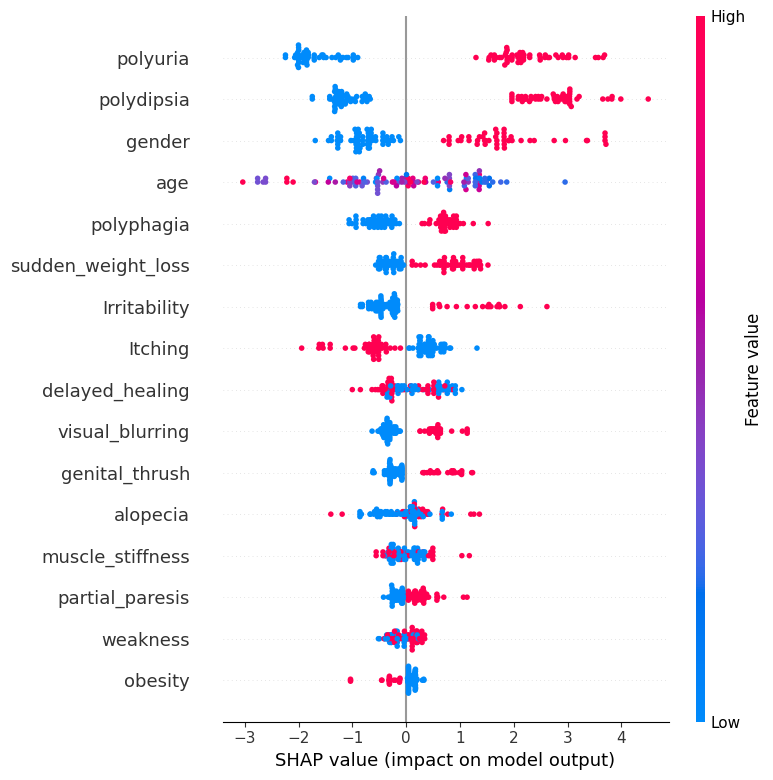

In [14]:
shap.initjs()
shap.summary_plot(shap_values, X_test)